_Lambda School Data Science, Unit 2_
 
# Regression 1 Sprint Challenge

Your Sprint Challenge has two parts.

To demonstrate mastery on each part, do all the required, numbered instructions. 

To earn a score of "3" for the part, also do the stretch goals.

## Part 1. Predict avocado sales 🥑

For part 1 of your challenge, you'll use historical data on avocado sales across the nation!

Run this code cell to load the dataset. It has weekly sales volume (total number of avocados sold) from January 4, 2015 through March 25, 2018. The data comes directly from retailers' cash registers based on actual retail sales of Hass avocados in multiple US markets.

In [1]:
import pandas as pd
avocado_url = 'https://drive.google.com/uc?export=download&id=1ljE-LhCA9CCFvSIJYJ1ewX8JmdDpfuhi'
avocado = pd.read_csv(avocado_url)
assert avocado.shape == (169, 2)

### Required

#### Use the Prophet library to:
1. Fit a model and forecast avocado sales through March 25, 2020
2. Plot the forecast
3. Plot the forecast components
4. Do time series cross-validation, with these parameters: `horizon='90 days', period='45 days', initial='730 days'`
5. Plot the cross-validation Mean Absolute Percentage Error: `metric='mape'`

_For Part 1 of this Sprint Challenge, you are **not** required to calculate or plot baselines, or do train/test split._

You can be confident you've done it correctly when your plots look similar to these:

<img src="https://i.imgur.com/PoyVGp7.png" width="400" align="left">



### Stretch Goal
- Adjust your forecasts with Prophet's options for changepoints, holidays, and fourier order. Improve the cross-validation MAPE.

In [10]:
# import Prophet, manually re-register the matplotlib converters for pd.plotting
from fbprophet import Prophet
pd.plotting.register_matplotlib_converters()

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [4]:
avocado.dtypes

Date            object
Total Volume     int64
dtype: object

In [7]:
# change dates to datetimes
avocado['Date'] = pd.to_datetime(avocado['Date'])

In [9]:
# renaming the columns for use with Prophet
avocado = avocado.rename(columns={'Date':'ds','Total Volume':'y'})
avocado.head()

,ds,y
0,2015-01-04,84674288
1,2015-01-11,78555753
2,2015-01-18,78388735
3,2015-01-25,76466226
4,2015-02-01,119453181


In [11]:
# fit the model by instantiating a new Prophet object 
# call fit method and pass in dataframe

m = Prophet()
m.fit(avocado)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/stephensinclair/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [14]:
# use helper method to get dataframe that extends into the future
# default includes dates from the history

future = m.make_future_dataframe(periods=731)
future.tail()

,ds
895,2020-03-21
896,2020-03-22
897,2020-03-23
898,2020-03-24
899,2020-03-25


In [15]:
# predict method assigns a predicted value for each row
# forecast is a dataframe

forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
895,2020-03-21,1.074122e+08,1.033461e+08,1.283080e+08,1.054672e+08,1.094468e+08,8.224696e+06,8.224696e+06,8.224696e+06,8.224696e+06,8.224696e+06,8.224696e+06,0.0,0.0,0.0,1.156369e+08
896,2020-03-22,1.074242e+08,1.030596e+08,1.279518e+08,1.054749e+08,1.094620e+08,7.863338e+06,7.863338e+06,7.863338e+06,7.863338e+06,7.863338e+06,7.863338e+06,0.0,0.0,0.0,1.152875e+08
897,2020-03-23,1.074362e+08,1.022969e+08,1.278449e+08,1.054827e+08,1.094770e+08,7.383126e+06,7.383126e+06,7.383126e+06,7.383126e+06,7.383126e+06,7.383126e+06,0.0,0.0,0.0,1.148193e+08
898,2020-03-24,1.074482e+08,1.013921e+08,1.269441e+08,1.054907e+08,1.094920e+08,6.797260e+06,6.797260e+06,6.797260e+06,6.797260e+06,6.797260e+06,6.797260e+06,0.0,0.0,0.0,1.142454e+08
899,2020-03-25,1.074602e+08,1.006138e+08,1.253916e+08,1.054989e+08,1.095071e+08,6.121888e+06,6.121888e+06,6.121888e+06,6.121888e+06,6.121888e+06,6.121888e+06,0.0,0.0,0.0,1.135820e+08


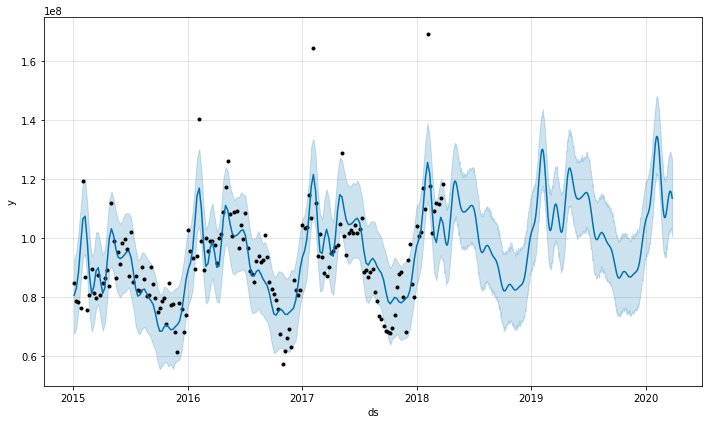

In [19]:
# call Prophet.plot method and pass forecast dataframe

fig1 = m.plot(forecast)

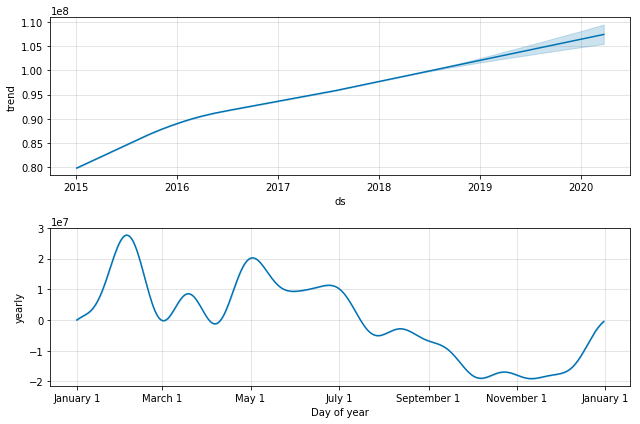

In [21]:
# plot forecast components with Prophet.plot_components method

fig2 = m.plot_components(forecast)

In [31]:
# Do time series cross-validation, with these parameters: horizon='90 days', period='45 days', initial='730 days'
# imports 
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [24]:
# use cross_validation to output a dataframe that can be used to compute error measures

df_cv = cross_validation(m, horizon='90 days', period='45 days', initial='730 days')
df_cv.head()

INFO:fbprophet:Making 8 forecasts with cutoffs between 2017-02-13 00:00:00 and 2017-12-25 00:00:00
/Users/stephensinclair/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/Users/stephensinclair/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/Users/stephensinclair/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-02-19,1.074485e+08,9.611938e+07,1.182779e+08,93821369,2017-02-13
1,2017-02-26,9.893847e+07,8.773274e+07,1.103022e+08,101447375,2017-02-13
2,2017-03-05,9.916884e+07,8.728287e+07,1.109161e+08,93528247,2017-02-13
3,2017-03-12,1.051806e+08,9.380412e+07,1.162495e+08,88180047,2017-02-13
4,2017-03-19,1.088121e+08,9.738932e+07,1.200988e+08,86991403,2017-02-13


In [28]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,9 days,1.160951e+14,1.077475e+07,9.057276e+06,0.102888,0.5
1,10 days,1.156367e+14,1.075345e+07,8.960854e+06,0.101672,0.5
2,11 days,8.989209e+13,9.481144e+06,7.981286e+06,0.088973,0.6
3,12 days,9.502117e+13,9.747880e+06,8.666280e+06,0.099210,0.6
4,13 days,9.555187e+13,9.775064e+06,8.875647e+06,0.097985,0.6


In [106]:
df_p['mape'].mean()

0.12333072004807567

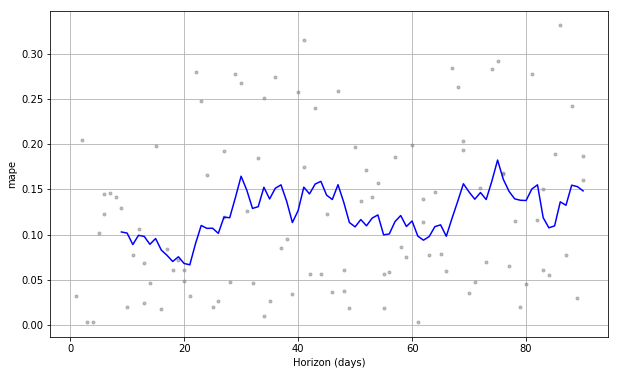

In [32]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [103]:
from fbprophet.plot import add_changepoints_to_plot

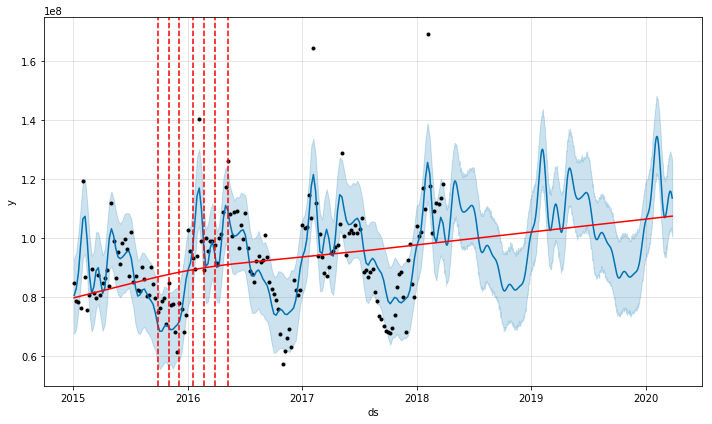

In [105]:
fig3 = m.plot(forecast)
a = add_changepoints_to_plot(fig3.gca(), m, forecast)

In [107]:
holidays = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2015-02-01', '2016-02-07', '2017-02-05', '2018-02-04', '2019-02-03', '2020-02-02']),
  'lower_window': 0,
  'upper_window': 1,
})

In [155]:
m2 = Prophet(holidays=holidays, yearly_seasonality=11)
forecast = m2.fit(avocado).predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/stephensinclair/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [156]:
df_cv2 = cross_validation(m2, horizon='90 days', period='45 days', initial='730 days')
df_p2 = performance_metrics(df_cv2)

INFO:fbprophet:Making 8 forecasts with cutoffs between 2017-02-13 00:00:00 and 2017-12-25 00:00:00
/Users/stephensinclair/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/Users/stephensinclair/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/Users/stephensinclair/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(

In [157]:
# slight improvement over 0.12333072004807567

df_p2['mape'].mean()

0.12089314055737027

## Part 2. Predict NYC apartment rent 🏠💸

For part 1 of your challenge, you'll use a real-world data with rent prices for a subset of apartments in New York City!

Run this code cell to load the dataset: 

In [33]:
rent_url = 'https://drive.google.com/uc?export=download&id=1lVVPmh-WYGb_0Gs_lOv22i02-150qDdZ'
rent = pd.read_csv(rent_url)
assert rent.shape == (48295, 7)

### Required
1. Begin with baselines for regression. Calculate the mean absolute error and $R^2$ score for a mean baseline. _(You can use the whole dataset, or a test set, either way is okay here!)_
2. Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
3. Choose any two features.
4. Use scikit-learn to fit a Linear Regression model on the train data.
5. Apply the model to predict rent prices for the test data.
6. Get regression metrics MAE and $R^2$ for the test data.
7. Get the model's coefficients and intercept.

### Stretch Goals
- Try at least 3 different feature combinations. (You don't have to use two features, you can choose any number of features.)
- Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.

In [44]:
rent.sort_values('month').tail()

,year,month,bedrooms,bathrooms,latitude,longitude,price
19430,2016,6,1,1.0,40.7984,-73.9632,1995
19429,2016,6,0,1.0,40.7565,-73.9690,2000
19428,2016,6,1,1.0,40.7431,-73.9792,3300
37113,2016,6,0,1.0,40.7590,-73.9691,2200
0,2016,6,3,1.5,40.7145,-73.9425,3000


In [38]:
rent.dtypes

year           int64
month          int64
bedrooms       int64
bathrooms    float64
latitude     float64
longitude    float64
price          int64
dtype: object

In [45]:
# mean baseline
rent['price'].mean()

3438.052034372088

In [46]:
rent['mean_baseline'] = rent['price'].mean()

In [47]:
rent.head()

,year,month,bedrooms,bathrooms,latitude,longitude,price,mean_baseline
0,2016,6,3,1.5,40.7145,-73.9425,3000,3438.052034
1,2016,6,2,1.0,40.7947,-73.9667,5465,3438.052034
2,2016,4,1,1.0,40.7388,-74.0018,2850,3438.052034
3,2016,4,1,1.0,40.7539,-73.9677,3275,3438.052034
4,2016,4,4,1.0,40.8241,-73.9493,3350,3438.052034


In [76]:
# sklearn imports
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import numpy as np

In [50]:
# Calculate the mean absolute error and  𝑅2 score for a mean baseline.

# A constant model that always predicts the expected value of y, 
# disregarding the input features, would get a R^2 score of 0.0.

mae = mean_absolute_error(rent['price'], rent['mean_baseline'])
r2 = r2_score(rent['price'], rent['mean_baseline'])

print(f'Mean absolute error for mean baseline: {mae}')
print(f'R^2 score for mean baseline: {r2}')

Mean absolute error for mean baseline: 1055.7857771080928
R^2 score for mean baseline: 0.0


In [51]:
# train/test split
# April and May in train, June in test

train = rent[(rent['month']==4) | (rent['month']==5)]
train['month'].value_counts()

4    16061
5    15451
Name: month, dtype: int64

In [52]:
test = rent[rent['month']==6]
test['month'].value_counts()

6    16783
Name: month, dtype: int64

In [53]:
# I choose bedrooms and bathrooms as features

# choose class of model

from sklearn.linear_model import LinearRegression

In [54]:
# instantiating the class with default hyperparameters

model = LinearRegression()

In [55]:
# Arrange data into feature matrix and target vector

features = ['bedrooms', 'bathrooms']
target = 'price'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [56]:
# Fit model to data by calling the fit() method of the model instance

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
# Apply model to data

y_test_pred = model.predict(X_test)

In [65]:
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f'Mean absolute error for model predictions on test data: {mae}')
print(f'R^2 score for model predictions on test data: {r2}')

Mean absolute error for model predictions on test data: 754.0733041489012
R^2 score for model predictions on test data: 0.4613584851907728


In [67]:
print(f'Model coefficient: {model.coef_}')
print(f'Model intercept: {model.intercept_}')

Model coefficient: [ 420.5097168  1531.76264753]
Model intercept: 994.306297505781


In [72]:
# Try linear regression with features: longitude, latitude

features = ['longitude', 'latitude']
target = 'price'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [73]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [81]:
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Root mean squared error for model predictions on train data: {train_mae}')
print(f'Mean absolute error for model predictions on train data: {train_mae}')
print(f'R^2 score for model predictions on train data: {train_r2}')
print('---'*26)
print(f'Root mean squared error for model predictions on test data: {test_mae}')
print(f'Mean absolute error for model predictions on test data: {test_mae}')
print(f'R^2 score for model predictions on test data: {test_r2}')

Root mean squared error for model predictions on train data: 993.6441630942365
Mean absolute error for model predictions on train data: 993.6441630942365
R^2 score for model predictions on train data: 0.10107742955983634
------------------------------------------------------------------------------
Root mean squared error for model predictions on test data: 989.1376935671776
Mean absolute error for model predictions on test data: 989.1376935671776
R^2 score for model predictions on test data: 0.09856326192854858


In [86]:
# Linear regression using bathrooms, longitude, latitude

features = ['bathrooms', 'longitude', 'latitude']
target = 'price'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [87]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [88]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [89]:
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Root mean squared error for model predictions on train data: {train_mae}')
print(f'Mean absolute error for model predictions on train data: {train_mae}')
print(f'R^2 score for model predictions on train data: {train_r2}')
print('---'*26)
print(f'Root mean squared error for model predictions on test data: {test_mae}')
print(f'Mean absolute error for model predictions on test data: {test_mae}')
print(f'R^2 score for model predictions on test data: {test_r2}')

Root mean squared error for model predictions on train data: 742.0692154568767
Mean absolute error for model predictions on train data: 742.0692154568767
R^2 score for model predictions on train data: 0.4939102534816301
------------------------------------------------------------------------------
Root mean squared error for model predictions on test data: 752.0323553309963
Mean absolute error for model predictions on test data: 752.0323553309963
R^2 score for model predictions on test data: 0.4787000073252905


In [99]:
# Linear regression, four features

features = ['bedrooms', 'bathrooms', 'longitude', 'latitude']
target = 'price'

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [100]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [102]:
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Root mean squared error for model predictions on train data: {train_mae}')
print(f'Mean absolute error for model predictions on train data: {train_mae}')
print(f'R^2 score for model predictions on train data: {train_r2}')
print('---'*26)
print(f'Root mean squared error for model predictions on test data: {test_mae}')
print(f'Mean absolute error for model predictions on test data: {test_mae}')
print(f'R^2 score for model predictions on test data: {test_r2}')

Root mean squared error for model predictions on train data: 651.3045731294724
Mean absolute error for model predictions on train data: 651.3045731294724
R^2 score for model predictions on train data: 0.5860641914447722
------------------------------------------------------------------------------
Root mean squared error for model predictions on test data: 667.6543093383531
Mean absolute error for model predictions on test data: 667.6543093383531
R^2 score for model predictions on test data: 0.5637948359714824


In [ ]:
# make a function?